In [2]:
## Change to the path where you want to save the model, or where you want to load the model from:
ROOT_PATH = '/content/drive/MyDrive/2022 files/CS 577/Assignments/hw1'

# Programming Questions: Q2

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import tensorflow
import keras
from keras.utils.np_utils import to_categorical
from keras import models, layers
from tensorflow.keras import optimizers
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.datasets import cifar10
import os

### Load data

In [7]:
# Load data, split into train/test
(X_trn_original, y_trn_original), (X_tst_original, y_tst_original) = cifar10.load_data()


# Reduce to subset of 3 classes (0, 1, 2)
X_trn = X_trn_original[np.where(y_trn_original[:,0] < 3)[0],:]
y_trn = y_trn_original[np.where(y_trn_original[:,0] < 3)[0],:]
X_tst = X_tst_original[np.where(y_tst_original[:,0] < 3)[0],:]
y_tst = y_tst_original[np.where(y_tst_original[:,0] < 3)[0],:]

print('Training data shape:', X_trn.shape)
print('Testing data shape:' , X_tst.shape)
print('Training data shape:', y_trn.shape)
print('Testing data shape:' , y_tst.shape)

# Split training data further into train/validation
val_n = int(X_tst.shape[0])

X_subset_trn, y_subset_trn   = X_trn[val_n:], y_trn[val_n:]
X_val,        y_val          = X_tst[:val_n], y_tst[:val_n]

# Convert all datapoints to float
X_subset_trn = (X_subset_trn.astype(float))/255.0
X_tst        = (X_tst.astype(float))/255.0
X_val        = (X_val.astype(float))/255.0

170508288/170498071 [==============================] - 2s 0us/step
Training data shape: (15000, 32, 32, 3)
Testing data shape: (3000, 32, 32, 3)
Training data shape: (15000, 1)
Testing data shape: (3000, 1)


### Vectorize labels

In [8]:
X_subset_trn = tensorflow.keras.backend.reshape(X_subset_trn, (X_subset_trn.shape[0],32*32*3))
X_tst        = tensorflow.keras.backend.reshape(X_tst, (X_tst.shape[0],32*32*3))
X_val        = tensorflow.keras.backend.reshape(X_val, (X_val.shape[0],32*32*3))

y_trn_cat = to_categorical(y_subset_trn[:,0], 3)
y_tst_cat = to_categorical(y_tst)
y_val_cat = to_categorical(y_val)

### Build, compile, and fit model

In [30]:
draft_model = models.Sequential()
draft_model.add(layers.Dense(32, activation='relu',input_shape=(32*32*3,)))
draft_model.add(layers.Dense(3, activation='softmax'))

draft_model.compile(optimizer=optimizers.SGD(learning_rate=0.01),
                                             loss='categorical_crossentropy',
                                             metrics=['accuracy'])
draft_history = draft_model.fit(X_subset_trn, 
                                y_trn_cat, 
                                epochs=200,
                                batch_size=16,
                                validation_data=(X_val, y_val_cat))


Epoch 1/200
750/750 [==============================] - 3s 3ms/step - loss: 0.8569 - accuracy: 0.6226 - val_loss: 0.7741 - val_accuracy: 0.6647
Epoch 2/200
750/750 [==============================] - 2s 3ms/step - loss: 0.7443 - accuracy: 0.6888 - val_loss: 0.6894 - val_accuracy: 0.7130
Epoch 3/200
750/750 [==============================] - 2s 3ms/step - loss: 0.7048 - accuracy: 0.7080 - val_loss: 0.7161 - val_accuracy: 0.6890
Epoch 4/200
750/750 [==============================] - 2s 3ms/step - loss: 0.6724 - accuracy: 0.7253 - val_loss: 0.6565 - val_accuracy: 0.7387
Epoch 5/200
750/750 [==============================] - 2s 3ms/step - loss: 0.6546 - accuracy: 0.7338 - val_loss: 0.7082 - val_accuracy: 0.6950
Epoch 6/200
750/750 [==============================] - 2s 3ms/step - loss: 0.6321 - accuracy: 0.7428 - val_loss: 0.6078 - val_accuracy: 0.7557
Epoch 7/200
750/750 [==============================] - 2s 3ms/step - loss: 0.6145 - accuracy: 0.7511 - val_loss: 0.5881 - val_accuracy: 0.7660

### Plot results from first model

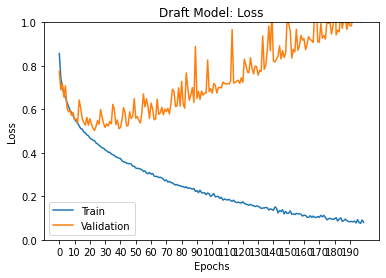

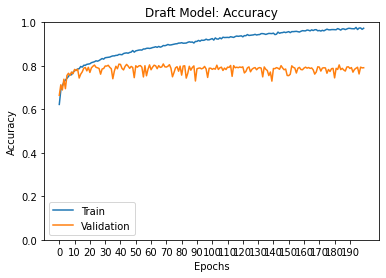

In [31]:
epochs_draft     = draft_history.params['epochs']
train_loss_draft = draft_history.history['loss']
train_acc_draft  = draft_history.history['accuracy']
val_loss_draft   = draft_history.history['val_loss']
val_acc_draft    = draft_history.history['val_accuracy']

plt.plot(range(epochs_draft), train_loss_draft, label='Train')
plt.plot(range(epochs_draft), val_loss_draft,   label='Validation')
plt.xticks(range(epochs_draft)[0::10])
plt.ylim(0,1)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Draft Model: Loss')
plt.show()

plt.plot(range(epochs_draft), train_acc_draft, label='Train')
plt.plot(range(epochs_draft), val_acc_draft,   label='Validation')
plt.xticks(range(epochs_draft)[0::10])
plt.ylim(0,1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Draft Model: Accuracy')
plt.show()

### Update the model

In [32]:
final_model = models.Sequential()
final_model.add(layers.Dense(256, activation='relu',input_shape=(32*32*3,)))
final_model.add(layers.Dense(256, activation='relu',input_shape=(32*32*3,)))
final_model.add(layers.Dense(3, activation='softmax'))

final_model.compile(optimizer=optimizers.SGD(learning_rate=0.01),
                                             loss='categorical_crossentropy',
                                             metrics=['accuracy'])

final_history = final_model.fit(X_subset_trn, 
                                y_trn_cat, 
                                epochs=200,
                                batch_size=512,
                                validation_data=(X_val, y_val_cat))

Epoch 1/200
24/24 [==============================] - 1s 15ms/step - loss: 1.0231 - accuracy: 0.5170 - val_loss: 0.9530 - val_accuracy: 0.6263
Epoch 2/200
24/24 [==============================] - 0s 8ms/step - loss: 0.9225 - accuracy: 0.6338 - val_loss: 0.8906 - val_accuracy: 0.6483
Epoch 3/200
24/24 [==============================] - 0s 8ms/step - loss: 0.8738 - accuracy: 0.6478 - val_loss: 0.8488 - val_accuracy: 0.6437
Epoch 4/200
24/24 [==============================] - 0s 8ms/step - loss: 0.8305 - accuracy: 0.6733 - val_loss: 0.8195 - val_accuracy: 0.6577
Epoch 5/200
24/24 [==============================] - 0s 8ms/step - loss: 0.8103 - accuracy: 0.6717 - val_loss: 0.8101 - val_accuracy: 0.6507
Epoch 6/200
24/24 [==============================] - 0s 8ms/step - loss: 0.7901 - accuracy: 0.6846 - val_loss: 0.7740 - val_accuracy: 0.6767
Epoch 7/200
24/24 [==============================] - 0s 8ms/step - loss: 0.7787 - accuracy: 0.6840 - val_loss: 0.7682 - val_accuracy: 0.6823
Epoch 8/200


### Plot results from updated model

94/94 [==============================] - 0s 3ms/step - loss: 0.5126 - accuracy: 0.7973


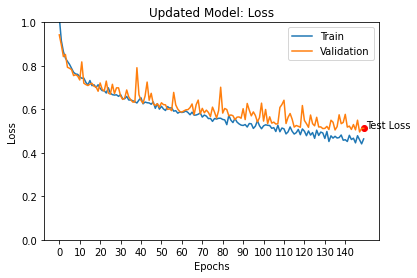


Final train loss: 0.464
Final test loss:  0.5126


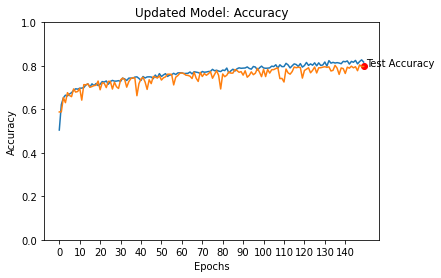


Final train accuracy: 0.81733
Final test accuracy:  0.79733


In [29]:
final_results = final_model.evaluate(X_tst,y_tst_cat,return_dict=True)
test_loss, test_acc = final_results['loss'], final_results['accuracy']
epochs     = final_history.params['epochs']
train_loss = final_history.history['loss']
train_acc  = final_history.history['accuracy']
val_loss   = final_history.history['val_loss']
val_acc    = final_history.history['val_accuracy']

plt.plot(range(epochs),train_loss, label='Train')
plt.plot(range(epochs),val_loss, label='Validation')
plt.scatter([epochs-1],[test_loss],color='red')
plt.annotate("Test Loss", (epochs, test_loss),color='black')
plt.xticks(range(epochs)[0::10])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0,1)
plt.legend()
plt.title('Updated Model: Loss')
plt.show()
print()
print(f'Final train loss: {round(train_loss[-1],5)}')
print(f'Final test loss:  {round(test_loss,5)}')

plt.plot(range(epochs),train_acc,label='')
plt.plot(range(epochs),val_acc)
plt.scatter([epochs-1],[test_acc],color='red')
plt.annotate("Test Accuracy", (epochs, test_acc),color='black')
plt.xticks(range(epochs)[0::10])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.title('Updated Model: Accuracy')
plt.show()
print()
print(f'Final train accuracy: {round(train_acc[-1],5)}')
print(f'Final test accuracy:  {round(test_acc,5)}')

### Compare to previous model

In [34]:
print(f'Training loss at epoch=200:')
print(f'    Initial model: {round(train_loss_draft[-1],5)}')
print(f'    Final model:   {round(train_loss[-1],5)}')
print(f'    Change:        {round(100*((train_loss[-1] - train_loss_draft[-1])/train_loss_draft[-1]),3)}%')
print()
print(f'Training accuracy at epoch=200:')
print(f'    Initial model: {round(100*train_acc_draft[-1],5)}%')
print(f'    Final model:   {round(100*train_acc[-1],5)}%')
print(f'    Change:        {round(100*((train_acc[-1] - train_acc_draft[-1])/train_acc_draft[-1]),3)}%')
print()
print(f'Validation loss at epoch=200:')
print(f'    Initial model: {round(val_loss_draft[-1],5)}')
print(f'    Final model:   {round(val_loss[-1],5)}')
print(f'    Change:        {round(100*((val_loss[-1] - val_loss_draft[-1])/val_loss_draft[-1]),5)}%')
print()
print(f'Validation accuracy at epoch=200:')
print(f'    Initial model: {round(100*val_acc_draft[-1],5)}%')
print(f'    Final model:   {round(100*val_acc[-1],5)}%')
print(f'    Change:        {round(100*(val_acc[-1] - val_acc_draft[-1])/val_acc_draft[-1],5)}%')
print()

Training loss at epoch=200:
    Initial model: 0.08015
    Final model:   0.464
    Change:        478.937%

Training accuracy at epoch=200:
    Initial model: 97.3%
    Final model:   81.73333%
    Change:        -15.999%

Validation loss at epoch=200:
    Initial model: 1.02714
    Final model:   0.5126
    Change:        -50.0941%

Validation accuracy at epoch=200:
    Initial model: 79.13333%
    Final model:   79.73334%
    Change:        0.75822%



### Test data performance

In [35]:
predictions = final_model.predict(X_tst)
predictions = np.asarray([np.argmax(p) for p in predictions])
prediction_results = pd.DataFrame({'Predicted':list(predictions),'Actual':list(y_tst[:,0])})


print('Sample predictions compared to ground truth:')
display(prediction_results[:10])

print(f'Final model test loss:         {round(test_loss,5)}')
print(f'Final model test accuracy:     {round(100*test_acc,5)}%')

Sample predictions compared to ground truth:


,Predicted,Actual
0,0,0
1,1,1
2,1,1
3,0,0
4,0,0
5,2,2
6,0,0
7,1,2
8,1,1
9,0,0


Final model test loss:         0.5126
Final model test accuracy:     79.73334%


### Save / Load Model

In [36]:
final_model.save(os.path.join(ROOT_PATH, 'Q2_model.h5'))
best_model = tensorflow.keras.models.load_model(os.path.join(ROOT_PATH, 'Q2_model.h5'))